In [ ]:
import pandas_datareader.data as pdr
import datetime

start=datetime.datetime(2016,2,19)
end=datetime.datetime(2020,2,20)
gs=pdr.DataReader("078930.KS",'yahoo',start,end)

In [ ]:
import pandas as pd
# excel 파일을 다운로드하는거와 동시에 pandas에 load하기
# 한국거래소에서 상장법인목록 다운로드하는 링크
df = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download', header=0)[0]
df = df.sort_values('상장일',ascending=True)

In [ ]:
df.tail(2)

### 주식 가져오기  
import pandas_datareader as pdr  
-1번 방법  
DataReader API를 통해서 yahoo finance의 주식 종목 데이터를 가져온다.  
df = pdr.DataReader('주식 종목코드', 'yahoo')  
-2번 방법  
get_data_yahoo API를 통해서 yahoo finance의 주식 종목 데이터를 가져온다.  
df = pdr.get_data_yahoo('주식 종목코드')  
선택적으로 일정 기간동안의 주식 정보를 가져오는 방법입니다.  
from datetime import datetime  
start = datetime(2018,1,1)  
end = datetime(2019,12,31)  
df = pdr.DataReader('주식 종목코드', 'yahoo', start, end)  
df = pdr.get_data_yahoo('주식 종목코드', start, end)  

[샘플보기]
https://wendys.tistory.com/

In [2]:
import pandas as pd
import pandas_datareader as pdr
# 종목 타입에 따라 download url이 다름. 종목코드 뒤에 .KS .KQ등이 입력되어야해서 Download Link 구분 필요
stock_type = {
'kospi': 'stockMkt',
'kosdaq': 'kosdaqMkt'
}
# 회사명으로 주식 종목 코드를 획득할 수 있도록 하는 함수
def get_code(df, name):
    code = df.query("name=='{}'".format(name))['code'].to_string(index=False)
    # 위와같이 code명을 가져오면 앞에 공백이 붙어있는 상황이 발생하여 앞뒤로 sript() 하여 공백 제거
    code = code.strip()
    return code

# download url 조합
def get_download_stock(market_type=None):
    market_type = stock_type[market_type]
    download_link = 'http://kind.krx.co.kr/corpgeneral/corpList.do'
    download_link = download_link + '?method=download'
    download_link = download_link + '&marketType=' + market_type
    df = pd.read_html(download_link, header=0)[0]
    return df

# kospi 종목코드 목록 다운로드
def get_download_kospi():
    df = get_download_stock('kospi')
    df.종목코드 = df.종목코드.map('{:06d}.KS'.format)
    return df

# kosdaq 종목코드 목록 다운로드
def get_download_kosdaq():
    df = get_download_stock('kosdaq')
    df.종목코드 = df.종목코드.map('{:06d}.KQ'.format)
    return df

# kospi, kosdaq 종목코드 각각 다운로드
kospi_df = get_download_kospi()
kosdaq_df = get_download_kosdaq()
# data frame merge
code_df = pd.concat([kospi_df, kosdaq_df])
temp=code_df
# data frame정리
code_df = code_df[['회사명', '종목코드']]
# data frame title 변경 '회사명' = name, 종목코드 = 'code'
code_df = code_df.rename(columns={'회사명': 'name', '종목코드': 'code'})
# 삼성전자의 종목코드 획득. data frame에는 이미 XXXXXX.KX 형태로 조합이 되어있음
code = get_code(code_df, '카카오')
# get_data_yahoo API를 통해서 yahho finance의 주식 종목 데이터를 가져온다.
df = pdr.get_data_yahoo(code)

#df['Adj Close'].plot()

C:\Users\user\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


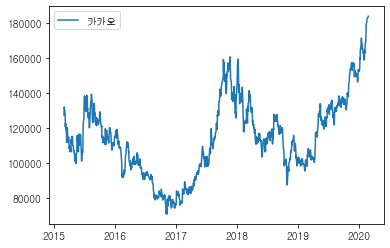

In [3]:
import matplotlib.pyplot as plt
#plt.rcParams["font.family"] = 'gulim'
plt.plot(df['Adj Close'],label='카카오')
plt.legend(loc=0)
plt.show()

In [ ]:
#폰트리스트
import matplotlib.font_manager as fm
font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list[:]

In [ ]:
temp.query("회사명=='{}'".format('슈피겐코리아'))

In [ ]:
#환경파일위치
import matplotlib
print (matplotlib.matplotlib_fname())

In [1]:
import matplotlib.pylab as plt
print(plt.rcParams["font.family"])
print(plt.rcParams["axes.unicode_minus"])

['gulim']
False
